In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Performing EDA

In [2]:
df = pd.read_csv("onlinefraud.csv")

In [3]:
df.shape

(6362620, 11)

In [18]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
df.isnull().sum() ### NO missing value

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

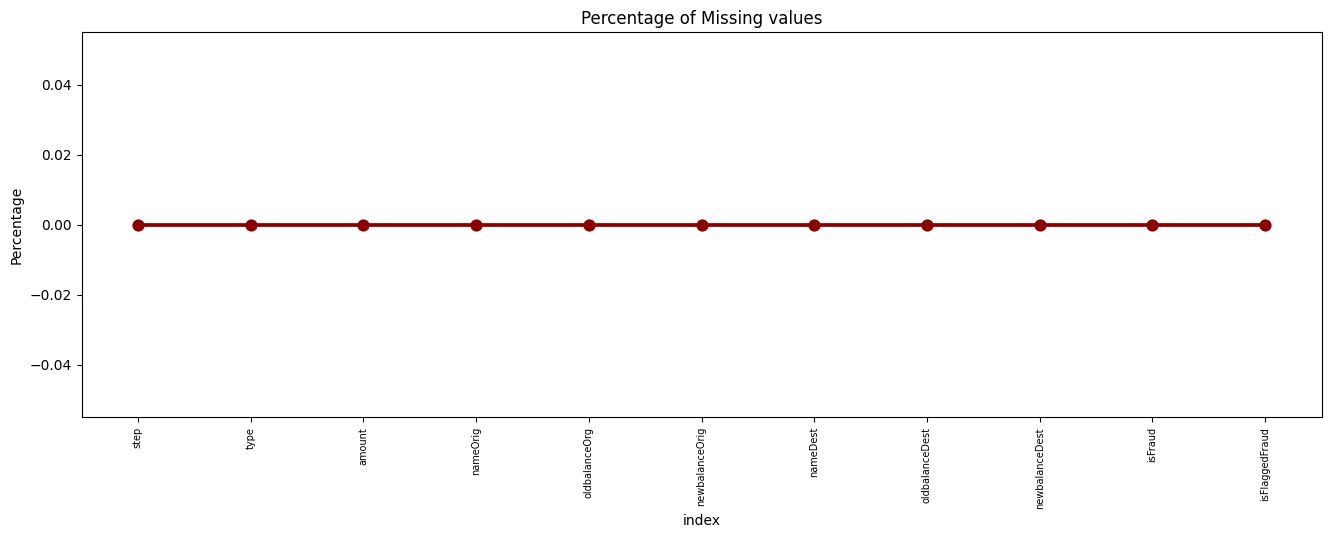

In [9]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing,color = 'darkred')
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("Percentage")
plt.show()

In [4]:
# finding the count of each unique value 
fraud_counts = df['isFraud'].value_counts()
fraud_counts

isFraud
0    6354407
1       8213
Name: count, dtype: int64

Text(0.5, 1.02, 'Graph')

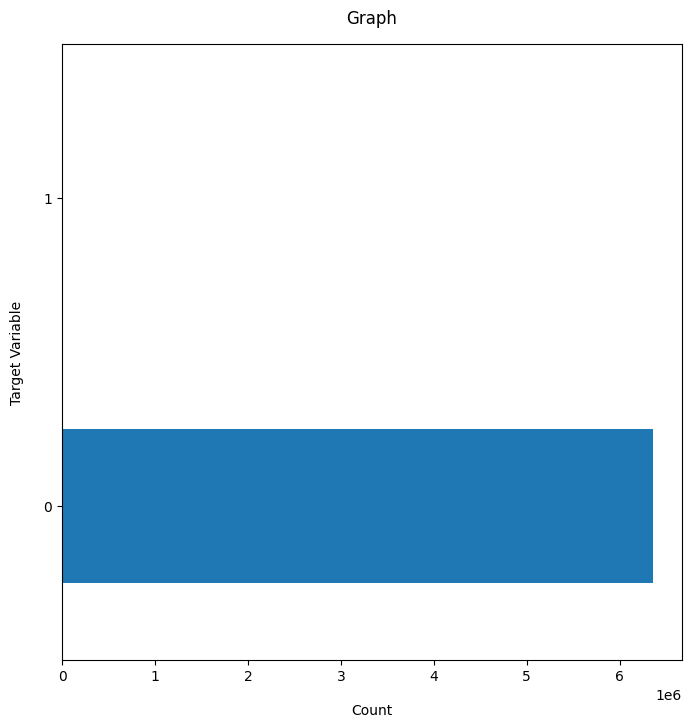

In [11]:
df['isFraud'].value_counts().plot(kind='barh',figsize=(8,8))
plt.xlabel("Count",labelpad=14)
plt.ylabel("Target Variable", labelpad =14)
plt.title("Graph",y=1.02)

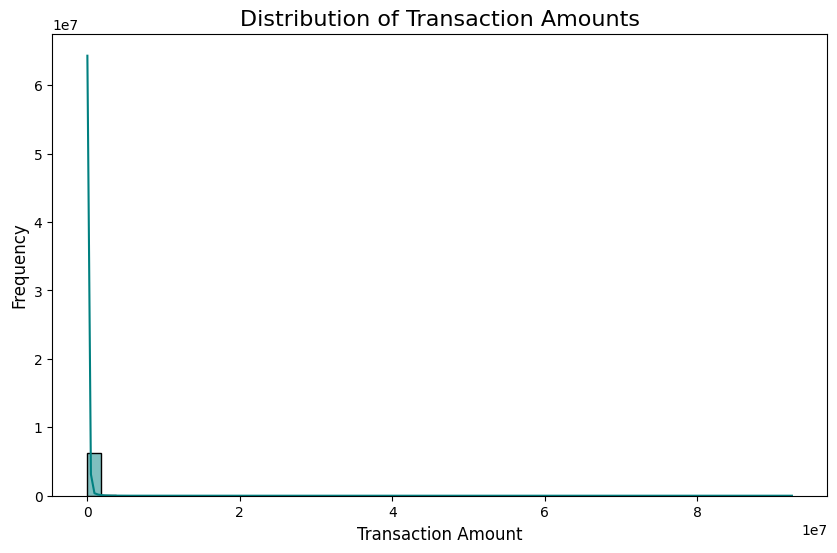

In [12]:
#finding the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['amount'], bins=50, kde=True, color='teal')
plt.title('Distribution of Transaction Amounts', fontsize=16)
plt.xlabel('Transaction Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [5]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [16]:
# df.drop(columns=['log_amount'],inplace=True)

C:\Users\Aryaan Bazaz\AppData\Local\Temp\ipykernel_10868\431294888.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='isFraud', y='amount', data=df, showfliers=True, palette=['green', 'red'])


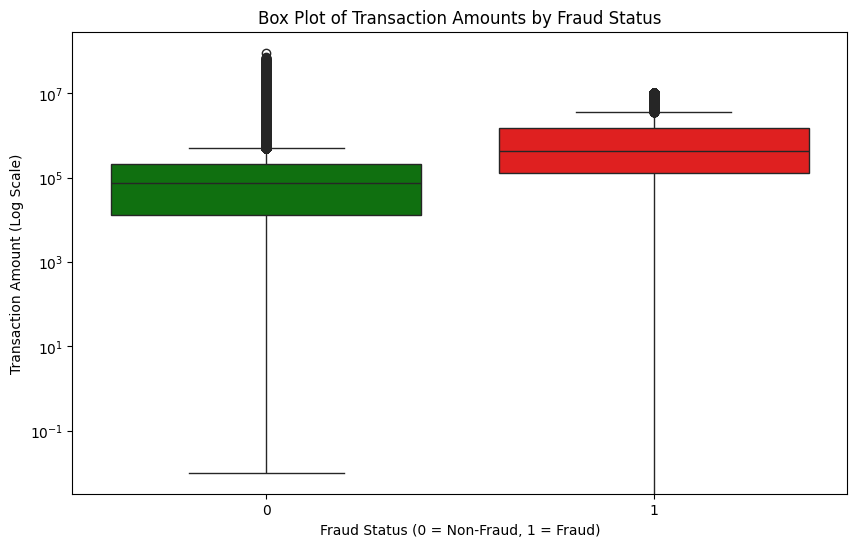

In [16]:
# creating a box plot to detect outliers based on fraud status
plt.figure(figsize=(10,6))
sns.boxplot(x='isFraud', y='amount', data=df, showfliers=True, palette=['green', 'red'])
plt.yscale('log')  # applying log scale to better visualize high transaction amounts
plt.title('Box Plot of Transaction Amounts by Fraud Status')
plt.xlabel('Fraud Status (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Transaction Amount (Log Scale)')
plt.show()

In [17]:
correlation = df[['amount', 'isFraud']].corr()

print("Correlation between Transaction Amount and Fraud Status:")
print(correlation)

Correlation between Transaction Amount and Fraud Status:
           amount   isFraud
amount   1.000000  0.076688
isFraud  0.076688  1.000000


In [18]:
# summary statistics of fraudulent and non-fraudulent transactions
fraud_stats = df[df['isFraud'] == 1]['amount'].describe()
non_fraud_stats = df[df['isFraud'] == 0]['amount'].describe()

print("Summary Statistics for Fraudulent Transactions:")
print(fraud_stats)

print("\nSummary Statistics for Non-Fraudulent Transactions:")
print(non_fraud_stats)

Summary Statistics for Fraudulent Transactions:
count    8.213000e+03
mean     1.467967e+06
std      2.404253e+06
min      0.000000e+00
25%      1.270913e+05
50%      4.414234e+05
75%      1.517771e+06
max      1.000000e+07
Name: amount, dtype: float64

Summary Statistics for Non-Fraudulent Transactions:
count    6.354407e+06
mean     1.781970e+05
std      5.962370e+05
min      1.000000e-02
25%      1.336840e+04
50%      7.468472e+04
75%      2.083648e+05
max      9.244552e+07
Name: amount, dtype: float64


C:\Users\Aryaan Bazaz\AppData\Local\Temp\ipykernel_10868\1931177141.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='type', data=df, palette='muted')
C:\Users\Aryaan Bazaz\AppData\Local\Temp\ipykernel_10868\1931177141.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')


Text(0, 0.5, 'Number of\xa0transactions')

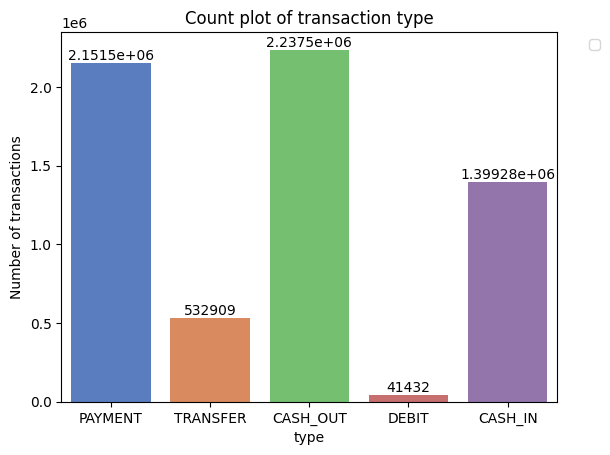

In [19]:
ax = sns.countplot(x='type', data=df, palette='muted')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of transaction type')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')

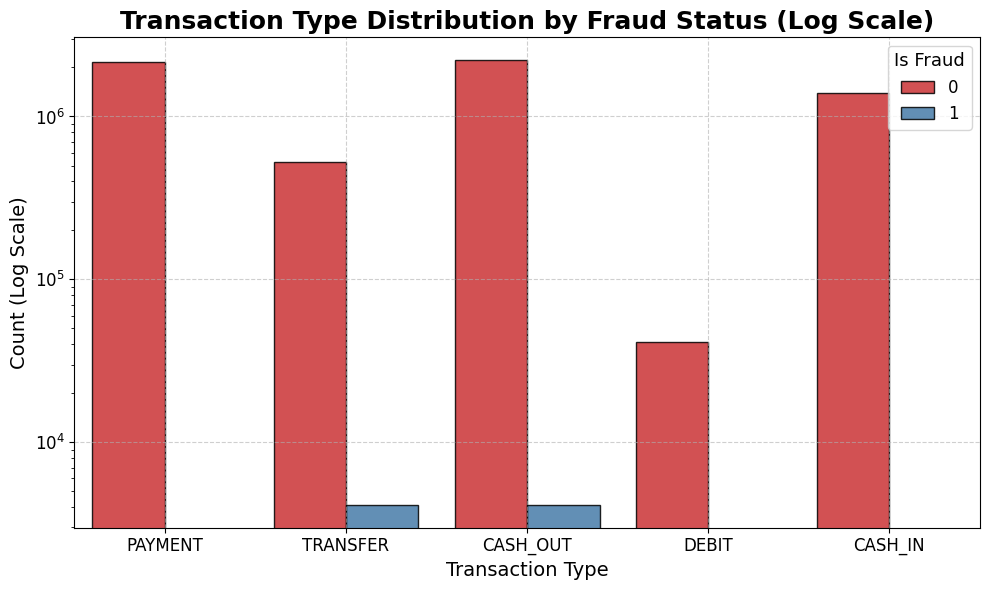

In [20]:
# enhancing the plot with logarithmic scale for transaction type distribution by fraud status
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type', hue='isFraud', palette='Set1', alpha=0.85, edgecolor='black')

# applying log on y scale
plt.yscale('log')

plt.title('Transaction Type Distribution by Fraud Status (Log Scale)', fontsize=18, fontweight='bold')
plt.xlabel('Transaction Type', fontsize=14)
plt.ylabel('Count (Log Scale)', fontsize=14)

# adjusting tick size for better visibility
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# adding gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# adjusting leged for better visibility
plt.legend(title='Is Fraud', title_fontsize='13', fontsize='12')

plt.tight_layout()  # ensuring the plot that fits well in the display area
plt.show()


In [21]:
total_transactions_by_type = df['type'].value_counts()

# fraudelent transactions per type
fraud_transactions_by_type = df[df['isFraud'] == 1]['type'].value_counts()

# fraud rate calculation
fraud_rate_by_type = fraud_transactions_by_type / total_transactions_by_type

# converting to percentage
fraud_rate_by_type = fraud_rate_by_type * 100

# displaying fraud rate for each type
print(fraud_rate_by_type)

type
CASH_IN          NaN
CASH_OUT    0.183955
DEBIT            NaN
PAYMENT          NaN
TRANSFER    0.768799
Name: count, dtype: float64


In [24]:
# df.drop(columns=["balance_change"],inplace = True)

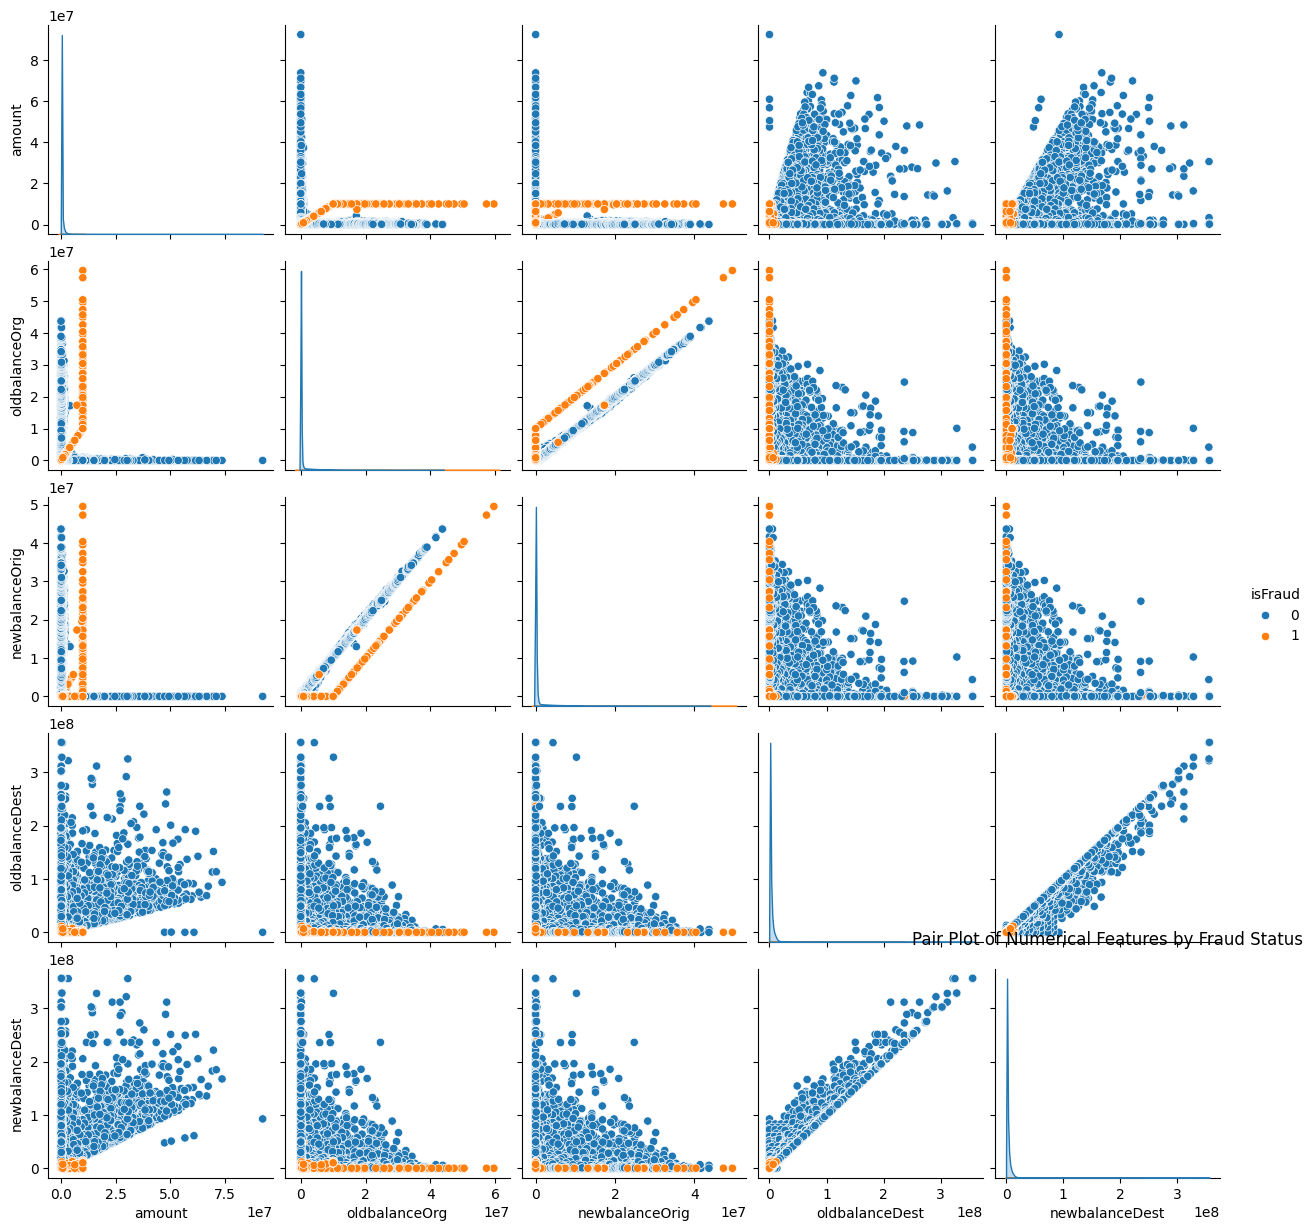

In [25]:
numerical_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
sns.pairplot(df[numerical_cols + ['isFraud']], hue='isFraud')
plt.title('Pair Plot of Numerical Features by Fraud Status')
plt.show()

In [4]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [5]:
# label encoding of categorical columns
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
lbl_cols = ['type', 'nameOrig', 'nameDest']
for col in lbl_cols:
    df[col] = lbl.fit_transform(df[col])
print(df.head())

   step  type    amount  nameOrig  oldbalanceOrg  newbalanceOrig  nameDest  \
0     1     3   9839.64    757869       170136.0       160296.36   1662094   
1     1     3   1864.28   2188998        21249.0        19384.72   1733924   
2     1     4    181.00   1002156          181.0            0.00    439685   
3     1     1    181.00   5828262          181.0            0.00    391696   
4     1     3  11668.14   3445981        41554.0        29885.86    828919   

   oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0             0.0             0.0        0               0  
1             0.0             0.0        0               0  
2             0.0             0.0        1               0  
3         21182.0             0.0        1               0  
4             0.0             0.0        0               0  


In [ ]:
# # # one hot encoding of categorical columns
# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder(drop='first', sparse_output=False)

# encoded_type = encoder.fit_transform(df[['type']])

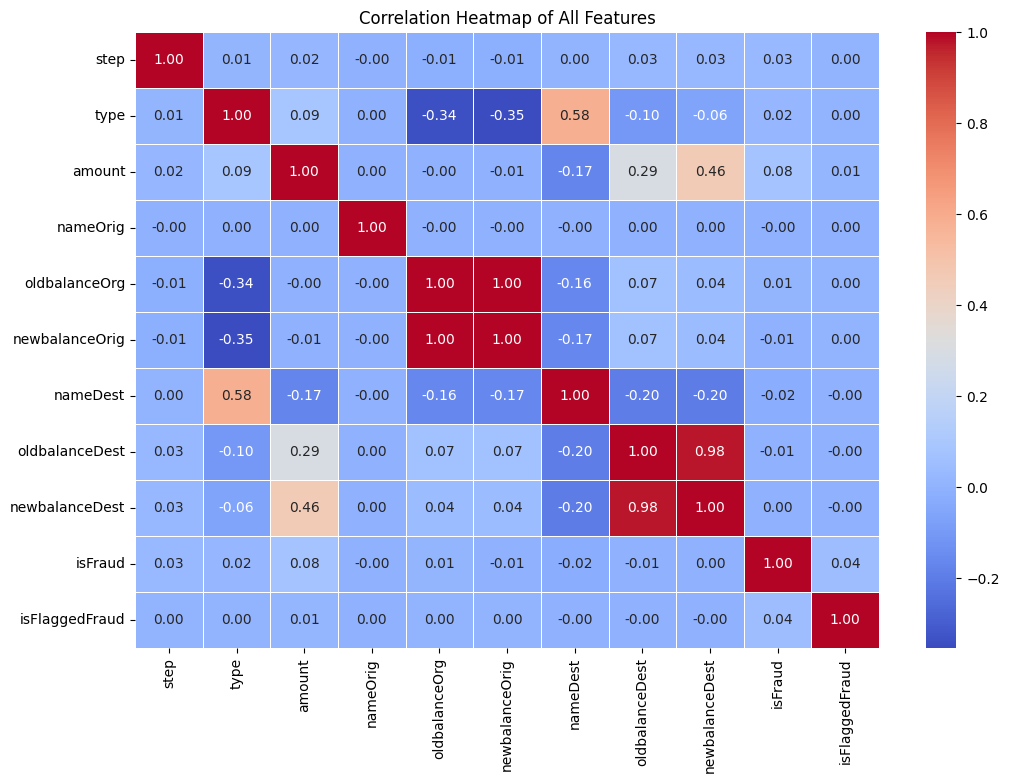

In [23]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of All Features')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
# intialising the label encoding process
lbl = LabelEncoder()

# columns that are label encoded
lbl_cols = ['type', 'nameOrig', 'nameDest']

# applying label encoding
for col in lbl_cols:
    df[col] = lbl.fit_transform(df[col])
print(df.head())


   step  type    amount  nameOrig  oldbalanceOrg  newbalanceOrig  nameDest  \
0     1     3   9839.64    757869       170136.0       160296.36   1662094   
1     1     3   1864.28   2188998        21249.0        19384.72   1733924   
2     1     4    181.00   1002156          181.0            0.00    439685   
3     1     1    181.00   5828262          181.0            0.00    391696   
4     1     3  11668.14   3445981        41554.0        29885.86    828919   

   oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0             0.0             0.0        0               0  
1             0.0             0.0        0               0  
2             0.0             0.0        1               0  
3         21182.0             0.0        1               0  
4             0.0             0.0        0               0  


In [7]:
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0.0,0.0,1.0,0.0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0.0,0.0,1.0,0.0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0.0,0.0,0.0,1.0
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1.0,0.0,0.0,0.0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0.0,0.0,1.0,0.0


In [6]:
df = df.drop(columns = ['isFlaggedFraud','step'])

In [7]:
# finding the count of each unique value
fraud_counts = df['isFraud'].value_counts()
fraud_counts

isFraud
0    6354407
1       8213
Name: count, dtype: int64

The above pie chart indicates skewness in the original dataset

In [27]:
## will tell the percentage of the pie chart
percentage=df['isFraud'].value_counts(normalize=True)*100

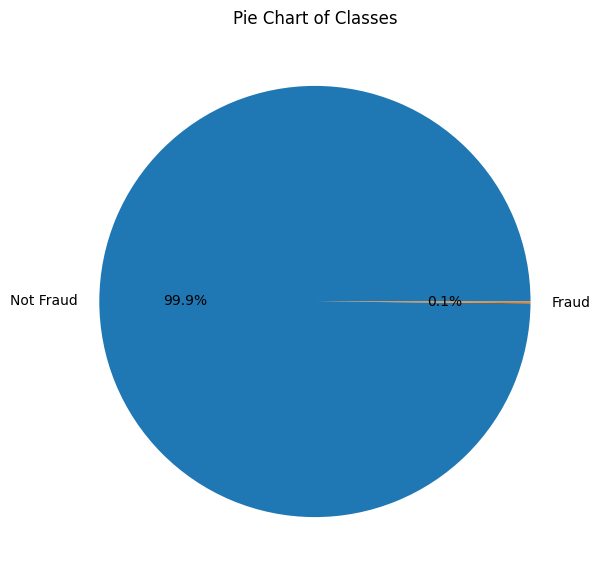

In [28]:
# plotting piechart
classlabels=["Not Fraud","Fraud"]
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')
plt.title("Pie Chart of Classes")
plt.show()

### upsampling the dataset

In [8]:
## upsampling
df_minority=df[df['isFraud']==1]
df_majority=df[df['isFraud']==0]

In [9]:
df_majority_reduced = df_majority.sample(frac=0.5, random_state=42)

In [10]:
df_majority_reduced

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1777056,1,183806.32,5339622,19391.00,0.00,123305,382572.19,566378.51,0
1350600,3,521.37,3397158,0.00,0.00,2085113,0.00,0.00,0
1991933,3,3478.18,2294486,19853.00,16374.82,2325890,0.00,0.00,0
5092368,3,1716.05,6069996,5769.17,4053.13,1003210,0.00,0.00,0
5066515,0,253129.93,3344533,1328499.49,1581629.42,396862,2713220.48,2460090.55,0
...,...,...,...,...,...,...,...,...,...
5976277,3,14154.31,6168770,0.00,0.00,1466103,0.00,0.00,0
2683322,4,720483.54,544576,50282.00,0.00,495682,737021.73,1457505.27,0
686005,0,246143.96,4898152,2686586.81,2932730.77,52171,902724.19,656580.23,0
5707386,4,519122.38,5913445,170.00,0.00,245036,0.00,519122.38,0


In [11]:
from sklearn.utils import resample ### creates more new points for the minority and equalise to the majority
df_minority_upsampled=resample(df_minority,replace=True, #sample With replacement
         n_samples=len(df_majority_reduced), ## increase to what amount
         random_state=42
        )

In [12]:
df_minority_upsampled.shape 

(3177204, 9)

In [13]:
df_minority_upsampled.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
6283817,1,619824.64,6319190,619824.64,0.0,435109,1420676.78,2040501.42,1
1030533,4,1871553.73,5293677,1871553.73,0.0,467086,0.00,0.00,1
6039793,1,156220.74,4345553,156220.74,0.0,466120,0.00,156220.74,1
6020336,4,1968008.53,1802310,1968008.53,0.0,230660,0.00,0.00,1
6074070,1,346293.24,5793034,346293.24,0.0,218408,750235.55,1096528.80,1


In [14]:
df_upsampled=pd.concat([df_majority_reduced,df_minority_upsampled])

In [15]:
df_upsampled['isFraud'].value_counts()

isFraud
0    3177204
1    3177204
Name: count, dtype: int64

storing the up sampled data into a csv file

In [16]:
df_upsampled.to_csv("final_dataset_up_new.csv",index = False)

### Down Sampling the dataset

In [11]:
from sklearn.utils import resample

df_majority_downsampled = resample(df_majority, 
                                   replace=False,  # sample without replacement
                                   n_samples=len(df_minority),  # match the number of minority class
                                   random_state=42)  # for reproducibility


df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# printing class distribution after downsampling
print("Class distribution after downsampling:")
print(df_downsampled['isFraud'].value_counts())


Class distribution after downsampling:
isFraud
0    8213
1    8213
Name: count, dtype: int64


made csv for down sampling

In [12]:
df_downsampled.to_csv("final_dataset_down.csv",index = False)

In [38]:
# #log transformation
df['log_amount'] = np.log1p(df['amount'])

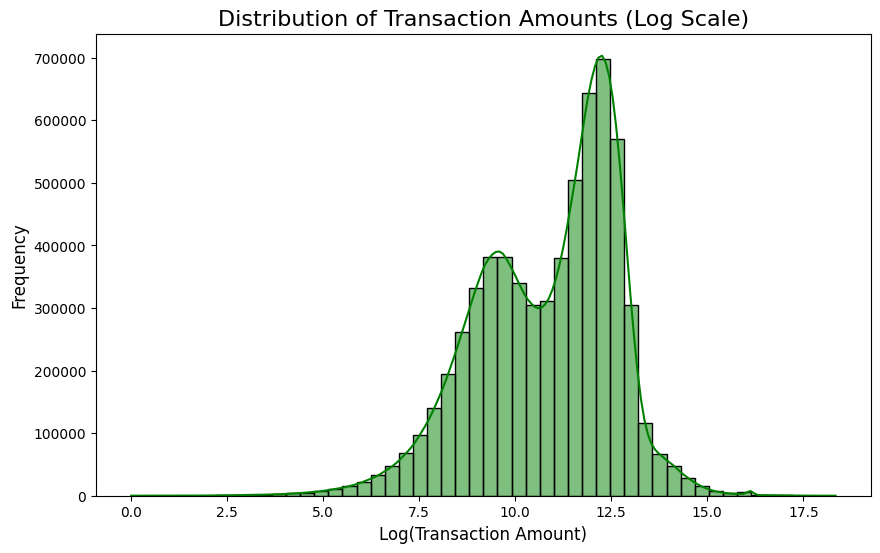

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(df['log_amount'], bins=50, kde=True, color='green')
plt.title('Distribution of Transaction Amounts (Log Scale)', fontsize=16)
plt.xlabel('Log(Transaction Amount)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

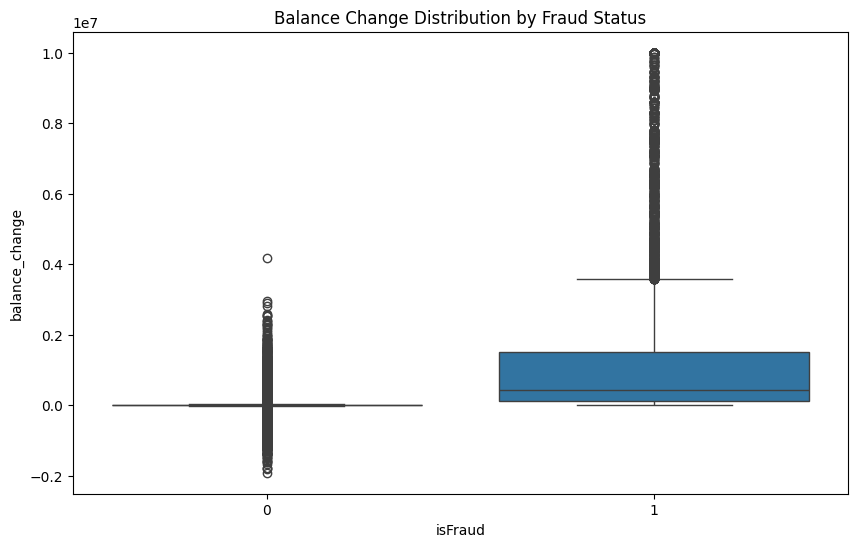

In [40]:
df['balance_change'] = df['oldbalanceOrg'] - df['newbalanceOrig']

# Check for fraudulent transactions with significant balance change
plt.figure(figsize=(10,6))
sns.boxplot(x='isFraud', y='balance_change', data=df)
plt.title('Balance Change Distribution by Fraud Status')
plt.show()

In [13]:
df

,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0.0,0.0,1.0,0.0
1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0.0,0.0,1.0,0.0
2,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0.0,0.0,0.0,1.0
3,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,1.0,0.0,0.0,0.0
4,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,1.0,0.0,0.0,0.0
6362616,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0.0,0.0,0.0,1.0
6362617,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,1.0,0.0,0.0,0.0
6362618,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0.0,0.0,0.0,1.0


In [42]:
df.drop(columns= ["log_amount","balance_change"],inplace = True)

In [14]:
df

,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0.0,0.0,1.0,0.0
1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0.0,0.0,1.0,0.0
2,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0.0,0.0,0.0,1.0
3,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,1.0,0.0,0.0,0.0
4,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,1.0,0.0,0.0,0.0
6362616,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0.0,0.0,0.0,1.0
6362617,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,1.0,0.0,0.0,0.0
6362618,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0.0,0.0,0.0,1.0
